In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import minimize, curve_fit
import astropy.units as u
import astropy.constants as const
import math
import statistics
from scipy.stats import linregress, pearsonr
from astropy.cosmology import WMAP9 as cosmo
import matplotlib.pyplot as plt
import matplotlib.cm
import scipy.signal as signal
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib.colors import (ListedColormap, LinearSegmentedColormap)

In [2]:
err_huincha = 0.05 # cm
err_transportador = 0.05 # deg

### EXPERIMENTO 1: VELOCIDAD DEL ULTRASONIDO

In [3]:
delta_r = (np.array([100, 89, 83, 77.5,
           68.6, 61, 52.3, 44.5, 38.6,
           29.3, 21.7, 15.1, 9.4]) * u.cm).to(u.m).value # cm
delta_t = (np.array([2.8, 2.640, 2.520, 2.200, 2.000,
           1.720, 1.480, 1.280, 1.040, 0.8000,
           0.5600, 0.360, 0.200]) * u.ms).to(u.s).value # ms

data_exp_1 = pd.DataFrame()
data_exp_1['delta_r'] = delta_r
data_exp_1['delta_t'] = delta_t
data_exp_1['delta_r_err'] = [err_huincha for i in range(len(delta_r))]
data_exp_1

,delta_r,delta_t,delta_r_err
0,1.000,0.00280,0.05
1,0.890,0.00264,0.05
2,0.830,0.00252,0.05
3,0.775,0.00220,0.05
4,0.686,0.00200,0.05
5,0.610,0.00172,0.05
6,0.523,0.00148,0.05
7,0.445,0.00128,0.05
8,0.386,0.00104,0.05
9,0.293,0.00080,0.05


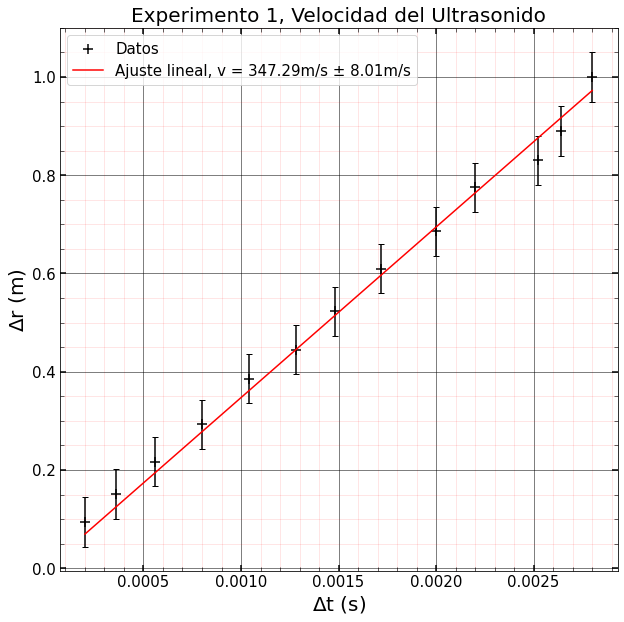

In [4]:
# grafico experimento 1
# GRAFICA DELTA_T EN FUNCION DE DELTA_R Y HAZ UN AJUSTE LINEAL ENTRE ELLAS

# Se define la función lineal
def f(x, v):
    return v * x

# Se definen los datos a graficar
x = data_exp_1['delta_t'] # s
y = data_exp_1['delta_r'] # m

# Se realiza el ajuste lineal tomando en cuenta los errores en y
popt, pcov = curve_fit(f, x, y, sigma=data_exp_1['delta_r_err'], absolute_sigma=True)

# Se grafican los datos y el ajuste
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(x, y, marker='+', c='black', s=100, label='Datos')
# agrega barras de error
ax.errorbar(x, y, yerr=data_exp_1['delta_r_err'], fmt='none', ecolor='black', capsize=3)

ax.plot(x, f(x, *popt), 'r-', label='Ajuste lineal, v = ' + str(round(popt[0], 2)) + 'm/s ± ' + str(round(np.sqrt(pcov[0][0]), 2)) + 'm/s')
ax.set_ylabel(r'$\Delta$r (m)', fontsize=20)
ax.set_xlabel(r'$\Delta$t (s)', fontsize=20)
ax.set_title('Experimento 1, Velocidad del Ultrasonido', fontsize=20)

ax.xaxis.set_minor_locator(MultipleLocator(0.0001))
ax.yaxis.set_minor_locator(MultipleLocator(0.05))

ax.tick_params(axis='both', labelsize=15, direction='in', right=True, top=True,
                length=6, width=1.5, grid_color='black', grid_alpha=1, grid_linestyle="-",
                grid_linewidth=0.5)

ax.tick_params(which='minor', length=4, color='black', direction='in', top=True, right=True,
                grid_alpha=0.2, grid_linewidth=0.5, grid_linestyle="-",grid_color='r')

ax.grid(True, which='both')
ax.legend(fontsize=15, markerscale=1)


In [5]:
((((347.29) + 8.01) * 100) / 343) - 1.25

102.33600583090379

### EXPERIMENTO 2: REFLEXION

In [6]:
theta_i = [20, 30, 40, 50, 60, 70, 10] # deg
theta_max_interval = [[27, 30], [46, 49], [85, 87], [94, 97], [123, 125], [134, 140], [22, 25]] # deg
theta_max = [28.5, 47.5, 86, 95.5, 124, 137, 23.5] # deg
theta_max_err = [(interval[1] - interval[0]) / 2 for interval in theta_max_interval] # deg

# combine theta_max_err with err_transportador using the formula for error propagation

data_exp_2 = pd.DataFrame()
data_exp_2['theta_i'] = theta_i
data_exp_2['theta_max'] = theta_max
data_exp_2['theta_max_err_prop'] = [np.sqrt(theta_max_err[i]**2 + [err_transportador for j in range(len(theta_max_err))][i]**2) for i in range(len(theta_max_err))]
data_exp_2['theta_i_err'] = [err_transportador for i in range(len(theta_i))]
data_exp_2





,theta_i,theta_max,theta_max_err_prop,theta_i_err
0,20,28.5,1.500833,0.05
1,30,47.5,1.500833,0.05
2,40,86.0,1.001249,0.05
3,50,95.5,1.500833,0.05
4,60,124.0,1.001249,0.05
5,70,137.0,3.000417,0.05
6,10,23.5,1.500833,0.05


In [7]:
# MEAN VALUE OF THETA_MAX_ERR_PROP PLUS MINUS STANDARD DEVIATION
prom_err = statistics.mean(data_exp_2['theta_max_err_prop'])
dev_err = statistics.stdev(data_exp_2['theta_max_err_prop'])
print(prom_err, dev_err)



1.5723210693010046 0.672327448151199


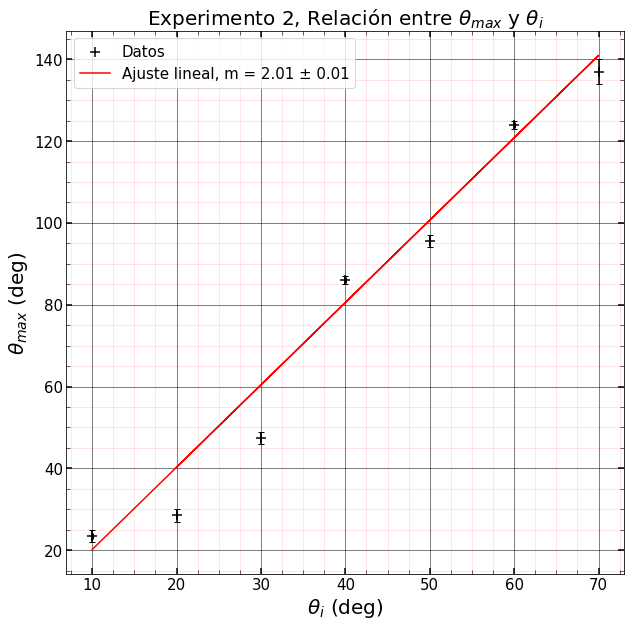

In [8]:
# GRAFICA THETA_MAX EN FUNCION DE THETA_I Y HAZ UN AJUSTE LINEAL ENTRE ELLAS

# Se define la función lineal
def f(x, v):
    return v * x

# Se definen los datos a graficar
x = data_exp_2['theta_i'] # deg
y = data_exp_2['theta_max'] # deg

# Se realiza el ajuste lineal tomando en cuenta los errores en x e y
popt, pcov = curve_fit(f, x, y, sigma=data_exp_2['theta_max_err_prop'], absolute_sigma=True)

# Se grafican los datos y el ajuste
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(x, y, marker='+', c='black', s=100, label='Datos')
# agrega barras de error
ax.errorbar(x, y, xerr=data_exp_2['theta_i_err'], yerr=data_exp_2['theta_max_err_prop'], fmt='none', ecolor='black', capsize=3)

ax.plot(x, f(x, *popt), 'r-', label='Ajuste lineal, m = ' + str(round(popt[0], 2)) + ' ± ' + str(round(np.sqrt(pcov[0][0]), 2)))
ax.set_ylabel(r'$\theta_{max}$ (deg)', fontsize=20)
ax.set_xlabel(r'$\theta_{i}$ (deg)', fontsize=20)
ax.set_title(r'Experimento 2, Relación entre $\theta_{max}$ y $\theta_{i}$', fontsize=20)

ax.xaxis.set_minor_locator(MultipleLocator(2.5))
ax.yaxis.set_minor_locator(MultipleLocator(5))

ax.tick_params(axis='both', labelsize=15, direction='in', right=True, top=True,
                length=6, width=1.5, grid_color='black', grid_alpha=1, grid_linestyle="-",
                grid_linewidth=0.5)

ax.tick_params(which='minor', length=4, color='black', direction='in', top=True, right=True,
                grid_alpha=0.2, grid_linewidth=0.5, grid_linestyle="-",grid_color='r')

ax.grid(True, which='both')
ax.legend(fontsize=15, markerscale=1)


In [9]:
pearson_theta = pearsonr(data_exp_2['theta_i'], data_exp_2['theta_max'])
pearson_theta

(0.9868351770321129, 3.7924651635892705e-05)

### EXPERIMENTO 4: DIFRACCION

In [10]:
theta = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45,
         50, 55, 60, 65, 70, 75, 80, 85, 90] # deg
amplitude = [2.40, 2.48, 1.24, 2.48, 0.640, 1.32, 1.00, 1.12, 0.840, 0.840,
             1.60, 0.800, 0.640, 0.720, 0.800, 0.560, 0.280, 0.480, 0.336] # volt

data_exp_3 = pd.DataFrame()
data_exp_3['theta'] = theta
data_exp_3['amplitude'] = amplitude 
data_exp_3['theta_err'] = [err_transportador for i in range(len(theta))]
data_exp_3

,theta,amplitude,theta_err
0,0,2.400,0.05
1,5,2.480,0.05
2,10,1.240,0.05
3,15,2.480,0.05
4,20,0.640,0.05
5,25,1.320,0.05
6,30,1.000,0.05
7,35,1.120,0.05
8,40,0.840,0.05
9,45,0.840,0.05


In [11]:
pearson_theta_v = pearsonr(data_exp_3['theta'], data_exp_3['amplitude'])
pearson_theta_v

(-0.7892479846918653, 5.887230926853365e-05)

$n\lambda = d[\sin{(\theta_{i})} \pm \sin{(\theta_{r})}]$

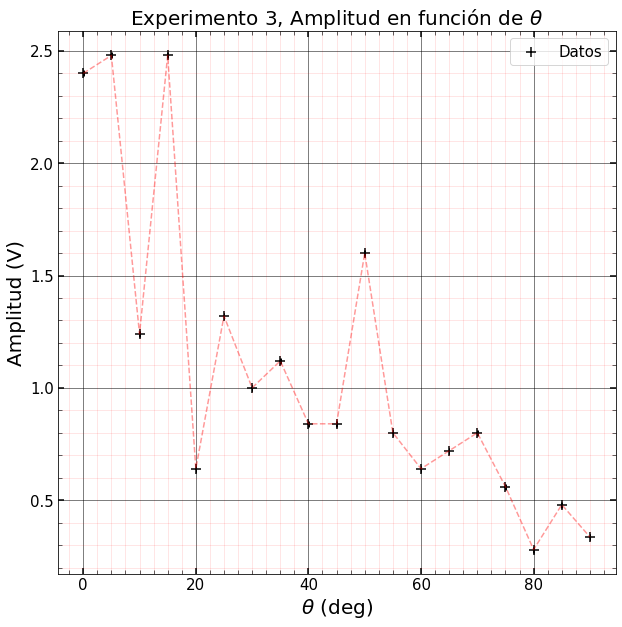

In [12]:
# GRAPH AMPLITUDE VS THETA, AND DONT DO A LINEAR FIT

# Se grafican los datos y el ajuste
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(data_exp_3['theta'], data_exp_3['amplitude'], marker='+', c='black', s=100, label='Datos')
# agrega barras de error
ax.errorbar(data_exp_3['theta'], data_exp_3['amplitude'], xerr=data_exp_3['theta_err'], fmt='none', ecolor='black', capsize=3)

ax.plot(data_exp_3['theta'], data_exp_3['amplitude'], c='red', linestyle='--', alpha=0.4)

# linear fit

# # Se define la función lineal
# def f(x, v, b):
#     return v * x + b

# # Se definen los datos a graficar
# x = data_exp_3['theta'] # deg
# y = data_exp_3['amplitude'] # volt

# # Se realiza el ajuste lineal tomando en cuenta los errores en x e y
# popt, pcov = curve_fit(f, x, y)

# ax.plot(x, f(x, *popt), 'r-', label='Ajuste lineal,\nCoeficiente de Pearson: ' + str(round(pearson_theta_v[0], 2)))

ax.set_ylabel('Amplitud (V)', fontsize=20)
ax.set_xlabel(r'$\theta$ (deg)', fontsize=20)
ax.set_title(r'Experimento 3, Amplitud en función de $\theta$', fontsize=20)

ax.xaxis.set_minor_locator(MultipleLocator(2.5))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))

ax.tick_params(axis='both', labelsize=15, direction='in', right=True, top=True,
                length=6, width=1.5, grid_color='black', grid_alpha=1, grid_linestyle="-",
                grid_linewidth=0.5)

ax.tick_params(which='minor', length=4, color='black', direction='in', top=True, right=True,
                grid_alpha=0.2, grid_linewidth=0.5, grid_linestyle="-",grid_color='r')

ax.grid(True, which='both')
ax.legend(fontsize=15, markerscale=1)

In [17]:
np.radians(np.array(data_exp_3['theta']))

array([0.        , 0.08726646, 0.17453293, 0.26179939, 0.34906585,
       0.43633231, 0.52359878, 0.61086524, 0.6981317 , 0.78539816,
       0.87266463, 0.95993109, 1.04719755, 1.13446401, 1.22173048,
       1.30899694, 1.3962634 , 1.48352986, 1.57079633])

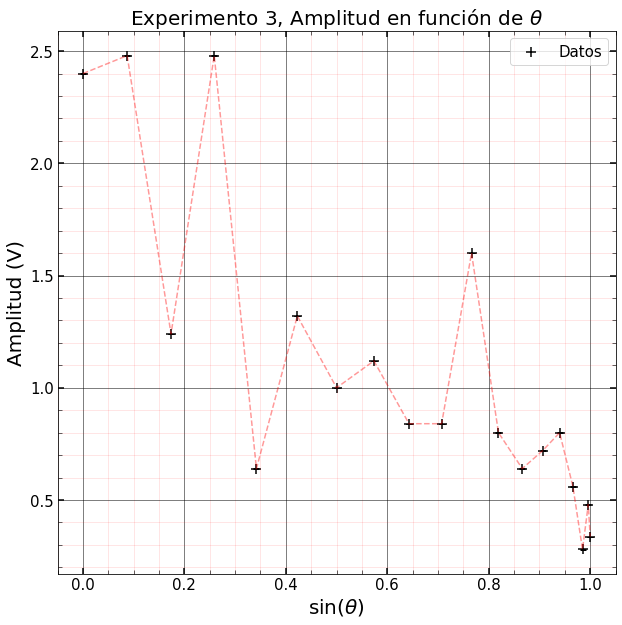

In [25]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(np.sin(np.radians(np.array(data_exp_3['theta']))), data_exp_3['amplitude'],  marker='+', c='black', s=100, label='Datos')
ax.errorbar(np.sin(np.radians(np.array(data_exp_3['theta']))), data_exp_3['amplitude'], yerr=np.sin(np.radians(np.array(data_exp_3['theta_err']))), fmt='none', ecolor='black', capsize=3)

ax.plot(np.sin(np.radians(np.array(data_exp_3['theta']))),data_exp_3['amplitude'], c='red', linestyle='--', alpha=0.4)

ax.set_ylabel('Amplitud (V)', fontsize=20)
ax.set_xlabel(r'sin($\theta$)', fontsize=20)
ax.set_title(r'Experimento 3, Amplitud en función de $\theta$', fontsize=20)

ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.xaxis.set_minor_locator(MultipleLocator(0.05))

ax.tick_params(axis='both', labelsize=15, direction='in', right=True, top=True,
                length=6, width=1.5, grid_color='black', grid_alpha=1, grid_linestyle="-",
                grid_linewidth=0.5)

ax.tick_params(which='minor', length=4, color='black', direction='in', top=True, right=True,
                grid_alpha=0.2, grid_linewidth=0.5, grid_linestyle="-",grid_color='r')

ax.grid(True, which='both')
ax.legend(fontsize=15, markerscale=1)